In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_indo = stopwords.words("indonesian") + list(punctuation)

# Import Data

In [3]:
df = pd.read_csv("data_text/df_cleaning1.csv")
df.head()

,label,fitur
0,1,pemakaian masker menyebabkan penyakit legionna...
1,1,instruksi gubernur jateng tentang penilangan b...
2,1,foto jim rohn jokowi adalah presiden terbaik d...
3,1,ini bukan politik tapi kenyataan pak jokowi be...
4,1,foto kadrun kalo lihat foto ini panas dingin k...


In [4]:
df.label.value_counts()

1    3465
0     766
Name: label, dtype: int64

# Dataset Splitting

In [5]:
X = df.fitur
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3384,), (847,), (3384,), (847,))

# Training

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)),
    ('algo', SVC(max_iter=500))
])

model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, scoring='f1', n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.7min finished
C:\Users\Yulika\anaconda3\envs\jcopdl\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Yulika\anaconda3\envs\jcopdl\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'algo__C': 1.368979599359222, 'algo__gamma': 0.36749049453053273}
0.9971191933741447 0.9046992507393613 0.8908964558721334


# Prediksi

In [11]:
y_pred = model.predict(X_test)

# Evaluasi

In [12]:
from sklearn.metrics import classification_report, f1_score

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.32      0.38       153
           1       0.86      0.92      0.89       694

    accuracy                           0.81       847
   macro avg       0.67      0.62      0.64       847
weighted avg       0.79      0.81      0.80       847



In [14]:
print(f1_score(y_test, y_pred))

0.8908964558721334


In [15]:
from jcopml.plot import plot_confusion_matrix

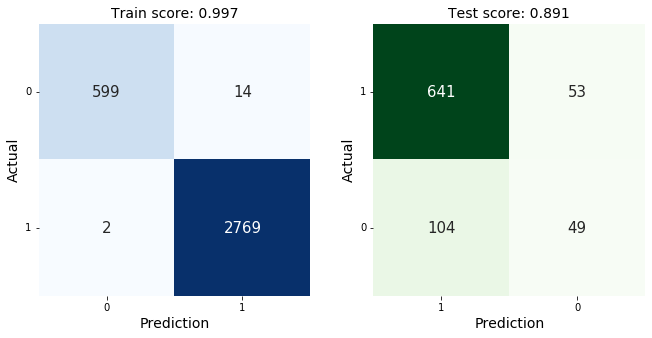

In [16]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)